<a href="https://colab.research.google.com/github/girlwcode/21-1_machineLearning/blob/main/Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이미지를 이용한 딥러닝에서는 fashin-MNIST 나 CIFAR-10 데이터를 사용하여 분류의 정확도를 분석하는 내용으로 진행해 주시면 됩니다.

더 다양한 분석이 가능하며, 예시로 들자면 conv, pool, dense 등의 layer를 다양하게 사용해 볼수 도 있으며,  데이터 증대, dropout 등도 고려해 볼수 있으며, 데이터 전이 학습도 가능합니다. 
또한 다양한 hyper-parameter에 따른 학습도 분석할 수 있을 것 같습니다. 그리고, 이미지의 경우 결과에서 잘못 분류된 이미지나 filter도 함께 확인이 가능하여 분석에 도움을 더 줄수 있을 것으로 생각됩니다.



In [ ]:
## Import the module and Dataset
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# Load Cifar10 and transform the Datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
## EXP1 : HyperParameter Tuning (layer: 5, dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
from keras import initializers
import matplotlib.pyplot as plt
import copy
result = {}
y = {}
loss = []
acc = []
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for dropout in dropouts:
    print ("Dropout: ", (dropout))
    model = Sequential()

    #-- layer 1
    model.add(Conv2D(32, (3, 3),activation='relu',input_shape=(32, 32,3)))
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    ##--layer 2
    model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))            
    model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))                    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))  

    ##-- layer 3
    model.add(Flatten())

    #-- layer 4
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout))

    #-- layer 5
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
    
    model_cce = model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, shuffle=True, validation_data=(x_test, y_test))
    
    score = model.evaluate(x_test, y_test, verbose=0)
    y[dropout] = model.predict(x_test)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    result[dropout] = copy.deepcopy(model_cce.history)   
    loss.append(score[0])
    acc.append(score[1])

Dropout:  0.0
Epoch 1/30
391/391 [==============================] - 10s 24ms/step - loss: 1.4080 - accuracy: 0.4899 - val_loss: 1.1040 - val_accuracy: 0.6043
Epoch 2/30
391/391 [==============================] - 11s 27ms/step - loss: 0.9625 - accuracy: 0.6633 - val_loss: 0.9429 - val_accuracy: 0.6716
Epoch 3/30
391/391 [==============================] - 10s 26ms/step - loss: 0.7751 - accuracy: 0.7294 - val_loss: 0.8015 - val_accuracy: 0.7238
Epoch 4/30
391/391 [==============================] - 10s 27ms/step - loss: 0.6285 - accuracy: 0.7817 - val_loss: 0.7695 - val_accuracy: 0.7362
Epoch 5/30
391/391 [==============================] - 10s 26ms/step - loss: 0.5101 - accuracy: 0.8224 - val_loss: 0.8124 - val_accuracy: 0.7360
Epoch 6/30
391/391 [==============================] - 9s 24ms/step - loss: 0.3892 - accuracy: 0.8626 - val_loss: 0.7851 - val_accuracy: 0.7561
Epoch 7/30
391/391 [==============================] - 10s 26ms/step - loss: 0.2754 - accuracy: 0.9044 - val_loss: 0.8307 - 

In [ ]:
acc

[0.7379999756813049,
 0.7634999752044678,
 0.7809000015258789,
 0.8036999702453613,
 0.7990999817848206,
 0.7990000247955322,
 0.7807000279426575,
 0.7134000062942505,
 0.5827999711036682,
 0.42239999771118164]

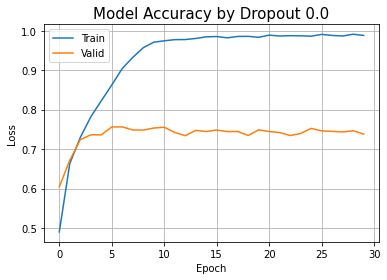

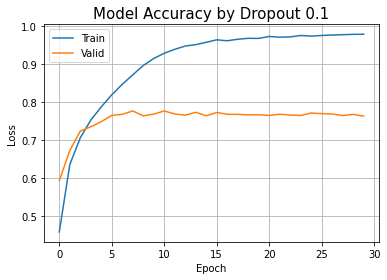

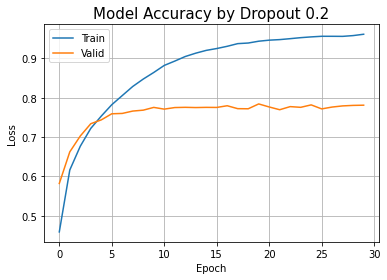

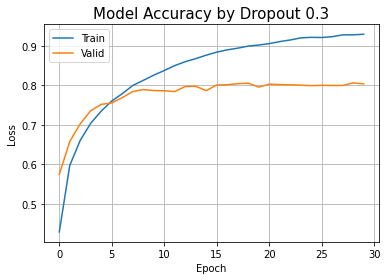

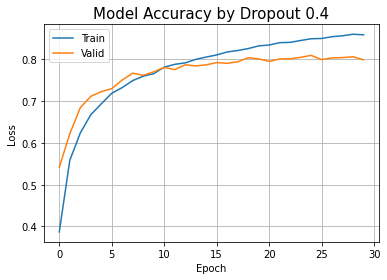

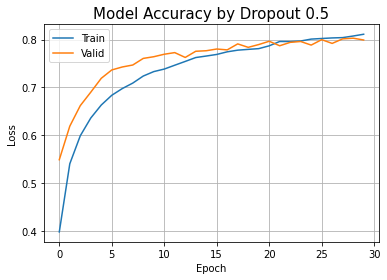

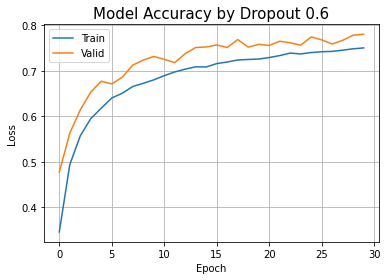

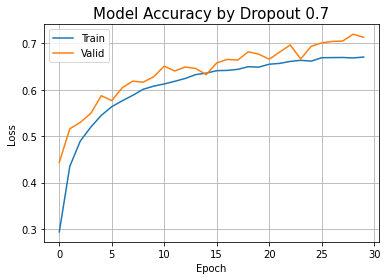

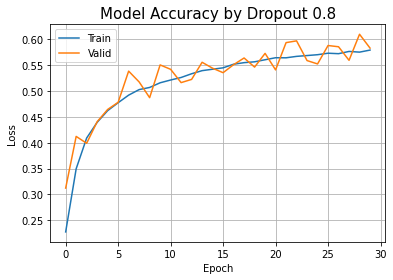

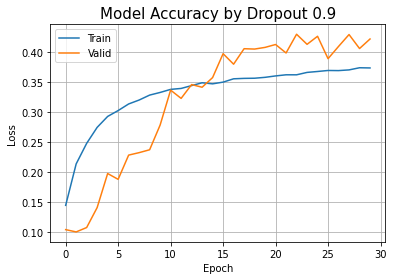

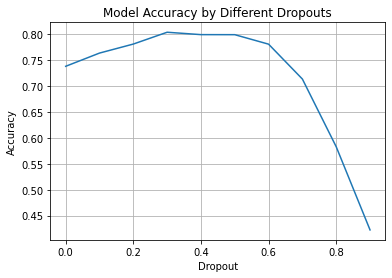

In [ ]:
## Plot the results
import matplotlib.pyplot as plt
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# Train Results per dropouts
for dropout in dropouts:
  hist = result[dropout]
  plt.plot(hist['accuracy'])
  plt.plot(hist['val_accuracy'])
  plt.title('Model Accuracy by Dropout {:.1f}'.format(dropout), fontsize=15)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Valid'],loc='best')
  plt.grid()
  plt.show()

# Test Accuracy Results 
plt.plot(dropouts,acc)
plt.title('Test Accuracy by Different Dropouts')
plt.ylabel('Accuracy')
plt.xlabel('Dropout')
plt.grid()
plt.show()

In [ ]:
## EXP2 : HyperParameter Tuning with best Dropouts using Keras Tuner (learningRates = .3)
from tensorflow import keras
!pip install -q -U keras-tuner
import kerastuner as kt
import IPython


     |████████████████████████████████| 98 kB 2.9 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [ ]:
def model_builder(hp):
  model = Sequential()

  dropout = .3
  #-- layer 1
  model.add(Conv2D(32, (3, 3),activation='relu',input_shape=(32, 32,3)))
  model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))

  ##--layer 2
  model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))            
  model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))                    
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))  

  ##-- layer 3
  model.add(Flatten())

  #-- layer 4
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(dropout))

  #-- layer 5
  model.add(Dense(10, activation='softmax'))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01 to 0.0001
  hp_learning_rate = hp.Float('learning_rate',min_value=0.0001, max_value=0.001, step=0.00001) 

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

  return model

In [ ]:
#  Keras 튜닝 방법 : Hyperband
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 20, # 각 모델별 학습 회수
                     factor = 3, # 한 번에 훈련할 모델 수 결정 변수
                     directory = 'my_dir',
                     project_name = 'intro_to_kt',
                     )

# New Section

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
# Search the HyperParameter
tuner.search(x_train, y_train, epochs = 5, validation_data = (x_test, y_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of learning rates is {best_hps.get('learning_rate')}.
""")

Trial 31 Complete [00h 07m 23s]
val_accuracy: 0.786300003528595

Best val_accuracy So Far: 0.7968000173568726
Total elapsed time: 01h 29m 27s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of learning rates is 0.00041999999999999996.



In [ ]:
# Trial 31 Complete [00h 08m 24s]
# val_accuracy: 0.7950999736785889

# Best val_accuracy So Far: 0.79830002784729
# Total elapsed time: 00h 26m 04s
# INFO:tensorflow:Oracle triggered exit

# The hyperparameter search is complete. The optimal number of learning rates is 0.00039999999999999996.

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4806 - accuracy: 0.4563 - val_loss: 1.1376 - val_accuracy: 0.5982
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0874 - accuracy: 0.6126 - val_loss: 0.9344 - val_accuracy: 0.6682
Epoch 3/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9145 - accuracy: 0.6777 - val_loss: 0.8186 - val_accuracy: 0.7128
Epoch 4/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8008 - accuracy: 0.7170 - val_loss: 0.7409 - val_accuracy: 0.7426
Epoch 5/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7212 - accuracy: 0.7461 - val_loss: 0.7116 - val_accuracy: 0.7515
Epoch 6/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6523 - accuracy: 0.7710 - val_loss: 0.6640 - val_accuracy: 0.7693
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5895 - accuracy: 0.7919 - val_loss: 0.6402 -

In [ ]:
# Test accuracy: 0.7542999982833862 - 0...066
# Test accuracy: 0.7993999719619751 - 0.00041999999999999996
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7993999719619751


In [ ]:
model_fin = Sequential()
hp_learning_rate = 0.00041999999999999996
dropout = .3

#-- layer 1
model_fin.add(Conv2D(32, (3, 3),activation='relu',input_shape=(32, 32,3)))
model_fin.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model_fin.add(MaxPooling2D(pool_size=(2, 2)))
model_fin.add(Dropout(dropout))

##--layer 2
model_fin.add(Conv2D(64, (3, 3), activation='relu',padding='same'))            
model_fin.add(Conv2D(64, (3, 3), activation='relu',padding='same'))                    
model_fin.add(MaxPooling2D(pool_size=(2, 2)))
model_fin.add(Dropout(dropout))  

##-- layer 3
model_fin.add(Flatten())

#-- layer 4
model_fin.add(Dense(512, activation='relu'))
model_fin.add(Dropout(dropout))

#-- layer 5
model_fin.add(Dense(10, activation='softmax'))

model_fin.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

In [7]:
hist = model_fin.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))
score = model_fin.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

from keras.models import load_model
model_fin.save('cifar10_mlp_model.h5')

Epoch 1/20
1563/1563 [==============================] - 266s 169ms/step - loss: 1.4886 - accuracy: 0.4590 - val_loss: 1.1286 - val_accuracy: 0.5933
Epoch 2/20
1563/1563 [==============================] - 272s 174ms/step - loss: 1.0906 - accuracy: 0.6109 - val_loss: 0.9139 - val_accuracy: 0.6817
Epoch 3/20
1563/1563 [==============================] - 274s 175ms/step - loss: 0.9157 - accuracy: 0.6764 - val_loss: 0.9754 - val_accuracy: 0.6635
Epoch 4/20
1563/1563 [==============================] - 275s 176ms/step - loss: 0.8090 - accuracy: 0.7146 - val_loss: 0.7586 - val_accuracy: 0.7356
Epoch 5/20
1563/1563 [==============================] - 276s 177ms/step - loss: 0.7252 - accuracy: 0.7456 - val_loss: 0.7658 - val_accuracy: 0.7360
Epoch 6/20
1563/1563 [==============================] - 282s 181ms/step - loss: 0.6589 - accuracy: 0.7688 - val_loss: 0.6938 - val_accuracy: 0.7622
Epoch 7/20
1563/1563 [==============================] - 279s 179ms/step - loss: 0.5968 - accuracy: 0.7901 - val_

In [11]:
model_fin.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 15, 64)        36928     
                                                      

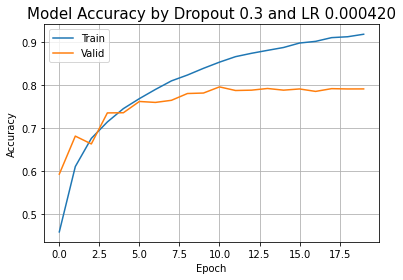

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy by Dropout 0.3 and LR {:.6f}'.format(hp_learning_rate), fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Valid'],loc='best')
plt.grid()
plt.show()

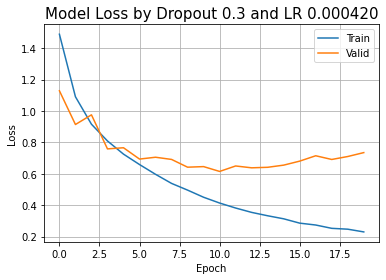

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss by Dropout 0.3 and LR {:.6f}'.format(hp_learning_rate), fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Valid'],loc='best')
plt.grid()
plt.show()

In [15]:
from keras.models import load_model
model_fin = load_model('cifar10_mlp_model.h5')

In [16]:
score = model_fin.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7914000153541565


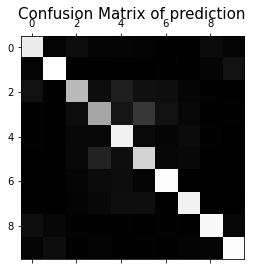

In [17]:
## Confusion Matrix - 잘못 분류한 이미지 확인
from sklearn.metrics import confusion_matrix
y_pred = model_fin.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
conf_mx = confusion_matrix(y_test, y_pred)
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.title('Confusion Matrix of prediction', fontsize=15)
plt.show()

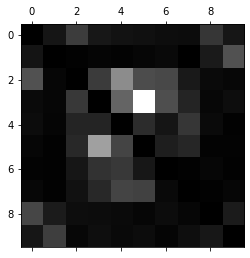

In [19]:
# label 3번이 잘 분류를 못하고 있음, 확인 필요 -> 3번 이미지가 적거나 / 3번을 잘 분류를 못하거나
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [61]:
## Import the module and Dataset
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# Load Cifar10 and transform the Datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [62]:
from keras.models import load_model
model_fin = load_model('cifar10_mlp_model.h5')

In [35]:
score = model_fin.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7914000153541565


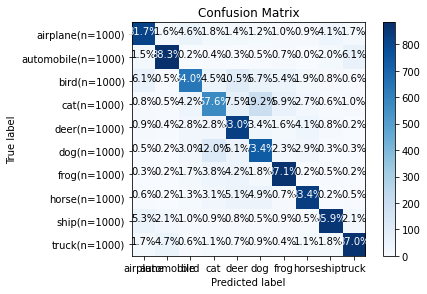

In [58]:
# confusion matrix 사용을 위한 라이브러리
from sklearn.metrics import confusion_matrix

# confusion matrix 그리는 함수 
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 예측값과 참값 
y_pred = model_fin.predict(x_test)
pred_labels = np.argmax(y_pred, axis=1)
y_test_np = np.argmax(y_test, axis=1)
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#메인 실행 
confusion_matrix = confusion_matrix(y_test_np, pred_labels)
plot_confusion_matrix(confusion_matrix, labels=labels, normalize=True)

In [ ]:
y_pred = model_fin.predict(x_test)

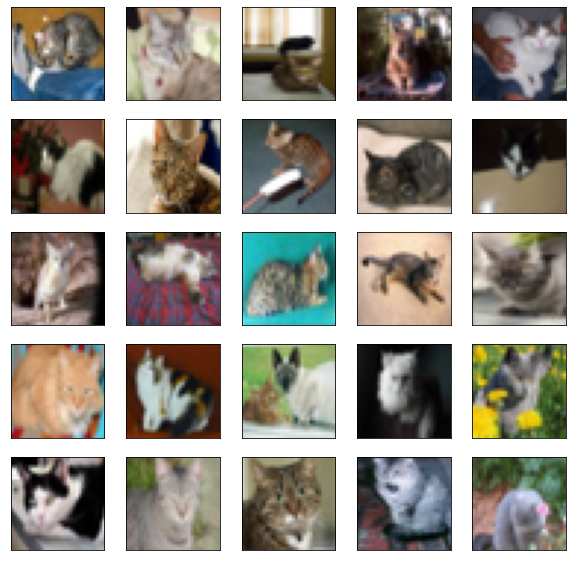

In [71]:
cl_a, cl_b = 3, 5
pred_labels = np.argmax(y_pred, axis=1)
y_test_np = np.argmax(y_test, axis=1)
X_aa = x_test[(y_test_np == cl_a) & (pred_labels == cl_a)]
X_ab = x_test[(y_test_np == cl_a) & (pred_labels == cl_b)]
X_ba = x_test[(y_test_np == cl_b) & (pred_labels == cl_a)]
X_bb = x_test[(y_test_np == cl_b) & (pred_labels == cl_b)]


plt.figure(figsize=(10,10))
# 3을 3으로 잘 분류(cat->cat)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_aa[i], cmap=plt.cm.binary)

plt.show()


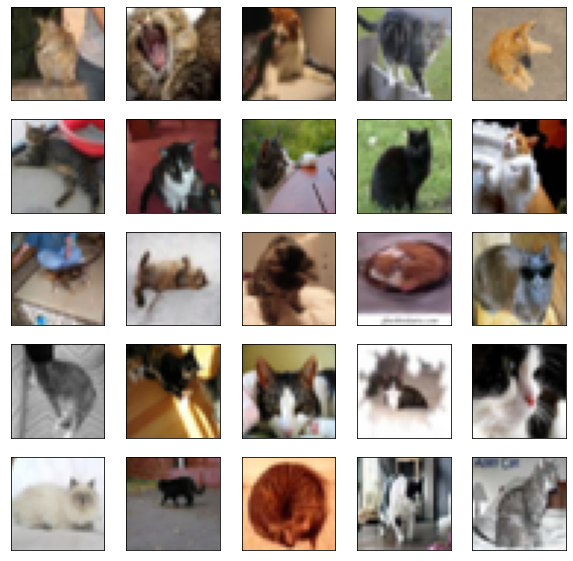

In [74]:
# 3인걸 5로 분류 (cat->dog)
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_ab[i], cmap=plt.cm.binary)
               
plt.show()

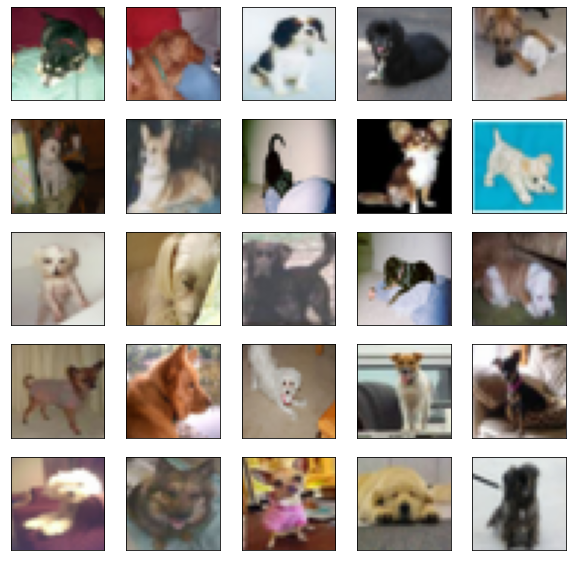

In [75]:
# 5인걸 3로 분류 (dog-> cat)
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_ba[i], cmap=plt.cm.binary)
               
plt.show()

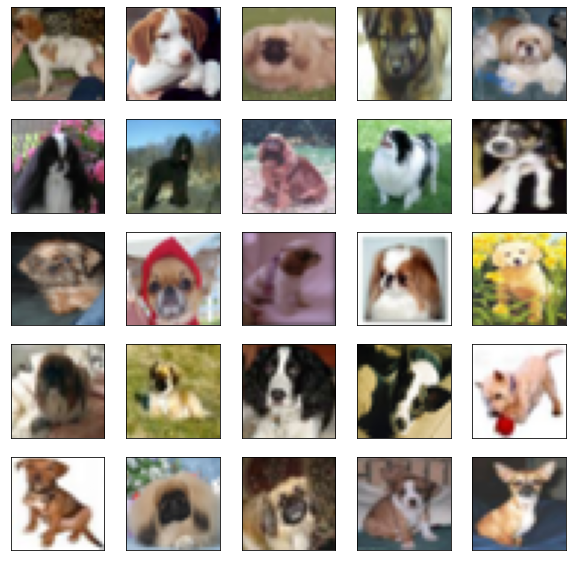

In [76]:

# 5인걸 5로 분류 (dog->dog)

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_bb[i], cmap=plt.cm.binary)
plt.show()